In [1]:
import numpy as np
import matplotlib.pyplot as plt
import my_star_functions as sf
from my_astro_constants import *
import my_numerical_methods as nm
from pprint import pprint
import my_ode_solvers as ode

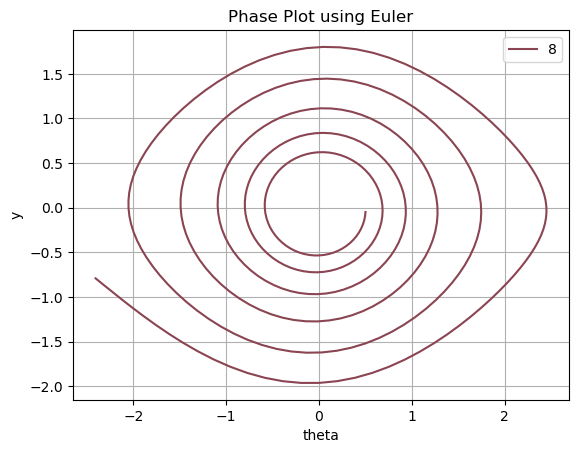

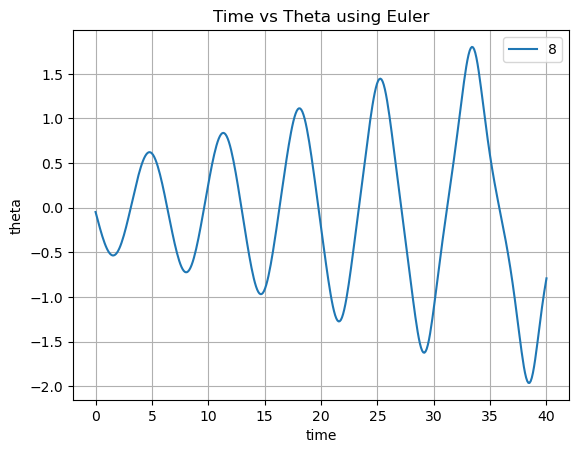

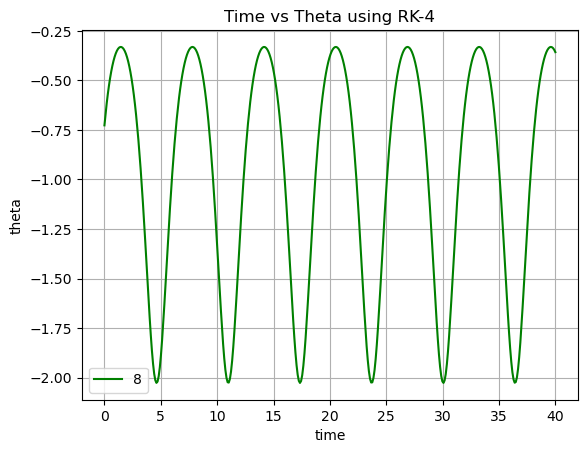

<Figure size 640x480 with 0 Axes>

In [2]:
#Pendelum Example
try:
    
    def f(state, p = 1):
        """
        Returns the derivatives for the pendulum system:
            - dy/dt = -sin(theta)
        """
        y, theta = state
        dy_dt = -np.sin(theta)
        dtheta_dt = y
        return np.array([dy_dt, dtheta_dt])
    
    initial_state = [0, 0.5]  # [y0, theta0]
    t0 = 0  # Initial time
    tstop = 40.0  # End time
    dt = 0.1  # Time step size
    step = int(tstop / dt) + 1  # Number of steps
    tol = 1E-6  # Tolerance

    results_euler = np.zeros((step, 2)) 

    # Euler method
    solver = ode.ODE_solver(f, initial_state, dt, results_euler, tol)
    results_euler = solver.integrate(t0, tstop, "euler")
    t_arr = np.linspace(0, tstop, num=len(results_euler))
    
    #phase plot
    sf.plot_func(results_euler[:, 1], results_euler[:, 0], xlabel = "theta", ylabel = "y", 
                 Title = "Phase Plot using Euler", label = "800 steps - phase plot", color = "#8A4452",
                 save_fig = True, figname = "Phase Plot using Euler.pdf")
    #time vs theta
    sf.plot_func(t_arr, results_euler[:, 0], xlabel = "time", ylabel = "theta", 
                 Title = "Time vs Theta using Euler", label = "800 steps - time vs theta",
                 save_fig = True, figname = "Time vs Theta using Euler.pdf")

    #ruler-k method
    results_runge = np.zeros((step, 2))  # Combined array for y and theta
    results_runge = solver.integrate(t0, tstop, "runge-kutta")
    t_arr_rk = np.linspace(0, tstop, num=len(results_runge))
    
    #time vs theta
    sf.plot_func(t_arr_rk, results_runge[:, 0], xlabel = "time", ylabel = "theta", 
                 Title = "Time vs Theta using RK-4", label = "800 steps", color = "green",
                 save_fig = True, figname = "Time vs Theta using RK-4.pdf")
    
except Exception as e:
    raise print(f"Something went wrong..{e}")

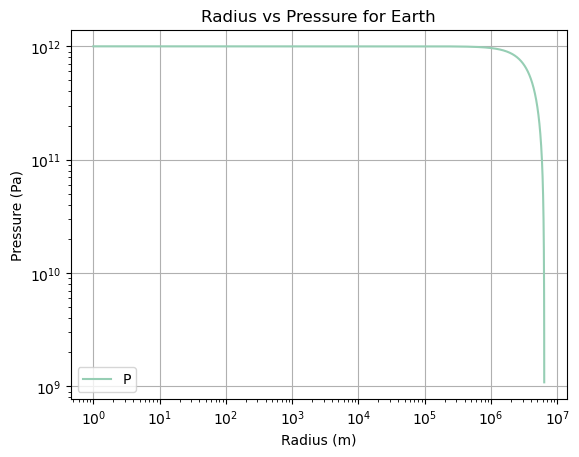

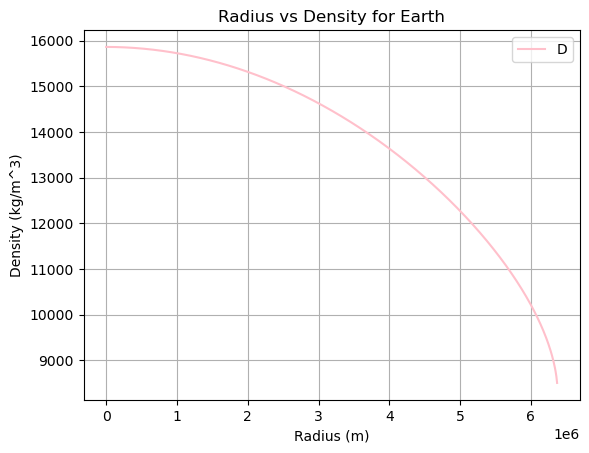

<Figure size 640x480 with 0 Axes>

In [3]:
#implementing as a hydrostatic equilibrium eqn
try:
    rho_0 = 8300  # Initial density (kg/m^3)
    r_0 = 1 # Initial radius (m)
    r_earth = 6371e3  # Earth's radius (m)
    dr = 1e4  # Step size (m)
    m_0 = 0 
    m_earth = 5.9722e24  # Mass of Earth (kg)
    n = 0.528
    c = 0.00349
    
    # Initial conditions
    P0 = 1E12  # Initial pressure at the center (Pa)
    int_earth = [P0, m_0, rho_0, n, c]  # Initial state vector [P, M, rho0, n, c]
    
    
    num_steps = int((r_earth - r_0) / dr) # Number of steps
    
    results_hydro = np.zeros((num_steps, 5)) 
    
    # hydrostatic-equilibrium
    solver = ode.ODE_solver(ode.hydro_equil, int_earth, dr, results_hydro)
    results_hydro = solver.integrate(tstop = r_earth, integrator = "runge-kutta")
    
    r_arr = np.linspace(r_0, r_earth, num=len(results_hydro))
    P_arr = results_hydro[:, 0]  # Pressure values
    rho_arr = np.array([ode.density_rocky(P, rho_0, n, c) for P in P_arr])  # Density values
    
    # Plotting
    sf.plot_func(r_arr[:len(results_hydro)], results_hydro[:, 0], xlabel="Radius (m)", ylabel="Pressure (Pa)", flag_x = 1, flag_y = 1, 
                 Title="Radius vs Pressure for Earth", label="Pressure", color="#96ceb4", save_fig = True, figname = "Radius vs Pressure for Earth.pdf")
    sf.plot_func(r_arr[:len(results_hydro)], rho_arr, xlabel="Radius (m)", ylabel="Density (kg/m^3)", 
                 Title="Radius vs Density for Earth", label="Density", color="pink", save_fig = True, figname = "Radius vs Density for Earth.pdf")

except Exception as e:
    raise print(f"Something went wrong..{e}")

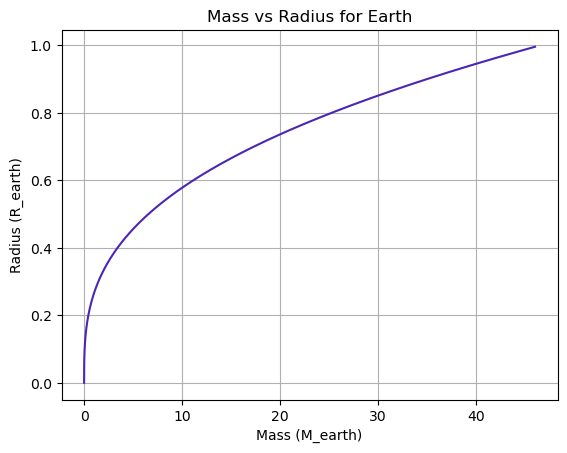

<Figure size 640x480 with 0 Axes>

In [4]:
# example uses a range of pressures..
try:
    # Define range of central pressures
    len_P0 = 10
    P0_values = np.logspace(11, 15, len_P0)
    
    # Initialize results array with 2 columns for [M_total/M_earth, R_final/R_earth]
    final = np.zeros((len_P0, 2))
    
    # Compute results for rho_0 (aka Earth!)
    final, r_pressure = ode.cleaning(final, rho_0, r_earth, P0_values, name_integrator='runge-kutta', n=0.528, c=0.00349)

    # Plot results
    sf.plot_func(final[:,1], r_pressure, xlabel="Mass (M_earth)", ylabel="Radius (R_earth)", Title="Mass vs Radius for Earth", color='#4B26B6',
                save_fig = True, figname = "Mass vs Radius for Earth.pdf")
except Exception as e:
    print(f"Something went wrong: {e}")

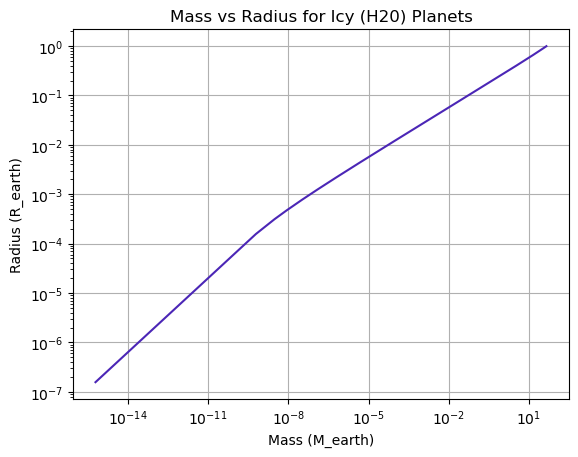

<Figure size 640x480 with 0 Axes>

In [5]:
#Plotting H20 Cores
#Constants
rho_water = 1460  # Density of water (kg/m^3)
c_water = 0.00311  # Constant parameter for water
n_water = 0.513  # Exponent parameter for water

# Initialize results array
final_water = np.zeros((len_P0, 2))

# Compute results for water
final_water, r_water = ode.cleaning(final_water, rho_water, r_earth, P0_values)

# Plot results
sf.plot_func(final_water[:,1], r_water, xlabel="Mass (M_earth)", ylabel="Radius (R_earth)", 
             flag_x = 1, flag_y = 1, Title="Mass vs Radius for Icy (H20) Planets", color='#4B26B6',
            save_fig = True, figname = "Icy (H20) Planets.pdf")

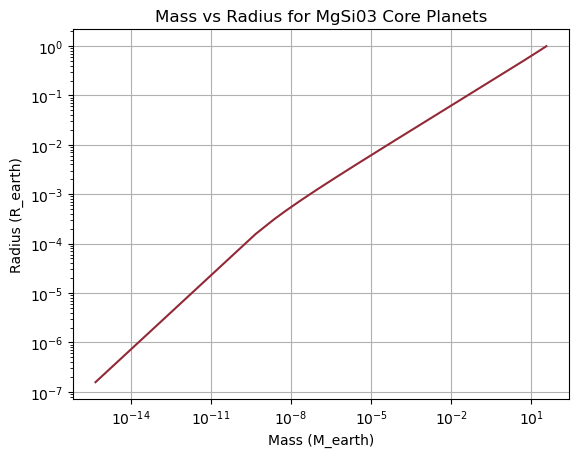

<Figure size 640x480 with 0 Axes>

In [6]:
#Plotting MgSi03 Cores
try:
    #define constants
    rho_mgsio = 3220  # Initial density (kg/m^3)
    c_mgsio = 0.00127
    n_mgsio  = 0.549
    
    # Initialize results array
    final_mgsio = np.zeros((len_P0, 2))
    
    # Compute results
    final_mgsio, r_mgsio = ode.cleaning(final_mgsio, rho_mgsio, n = n_mgsio, c = c_mgsio)

    # Plot results
    sf.plot_func(final_mgsio[:,1], r_mgsio, xlabel="Mass (M_earth)", ylabel="Radius (R_earth)", flag_x = 1, flag_y = 1, Title="Mass vs Radius for MgSi03 Core Planets",
                 color='#922937', save_fig = True, figname = "MgSi03 Core Planets.png") 

except Exception as e:
    print(f"Something went wrong: {e}")

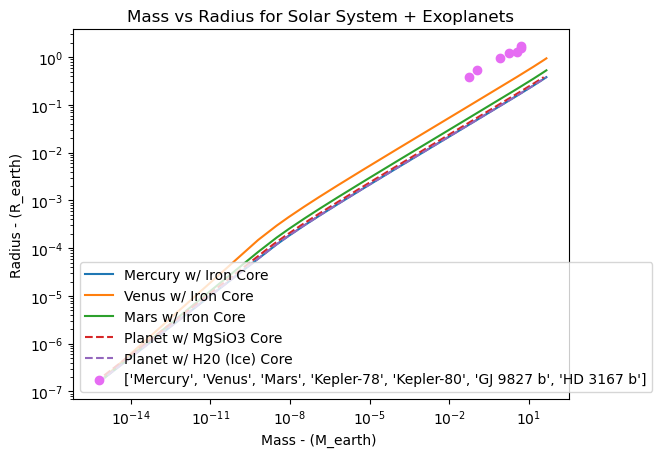

In [7]:
#planetary data

#dictionary: planets, the 1st three planets were not normalized by earth, so a boolean was implemented
#these are the actual values!
planets = [
    {"name": "Mercury", "mass": 3.30e23, "radius": 2.4397e6, "normalized": False},
    {"name": "Venus", "mass": 4.8673e24, "radius": 6.0518e6, "normalized": False},
    {"name": "Mars", "mass": 6.4169e23, "radius": 3.3962e6, "normalized": False},
    {"name": "Kepler-78", "mass": 1.87, "radius": 1.2, "normalized": True},
    {"name": "Kepler-80", "mass": 3.7, "radius": 1.3, "normalized": True},
    {"name": "GJ 9827 b", "mass": 4.89, "radius": 1.575, "normalized": True},
    {"name": "HD 3167 b", "mass": 5.02, "radius": 1.7, "normalized": True}
]

# Normalize mass and radius relative to Earth (if not already normalized)
planets_m = [planet["mass"] / m_earth if not planet["normalized"] else planet["mass"] for planet in planets]
planets_r = [planet["radius"] / r_earth if not planet["normalized"] else planet["radius"] for planet in planets]
planets_title = [planet["name"] for planet in planets]

errors = []

results_mercury = np.zeros((len_P0, 2))
results_venus = np.zeros((len_P0, 2))
results_mars  = np.zeros((len_P0, 2))

#Solve for Mercury 
results_mercury, r_mer_arr = ode.cleaning(results_mercury, rho_0, radius = planets[0]["radius"])
# Calculate relative errors
errors.append(ode.calculate_planet_errors(results_mercury, planets[0]))

# Solve for Venus
results_venus, r_venus_arr = ode.cleaning(results_venus, rho_0, radius = planets[1]["radius"])
# Calculate relative errors
errors.append(ode.calculate_planet_errors(results_venus , planets[1]))

# Solve for Mars
results_mars, r_mars_arr = ode.cleaning(results_venus, rho_0, radius =planets[2]["radius"])
errors.append(ode.calculate_planet_errors(results_mars, planets[2]))


#plotting for planets
fig, ax = plt.subplots()

ax.plot(results_mercury[:, 1], r_mer_arr, label  = 'Mercury w/ Iron Core')
ax.plot(results_venus[:, 1], r_venus_arr, label  = 'Venus w/ Iron Core')
ax.plot(results_mars[:, 1], r_mars_arr, label = 'Mars w/ Iron Core')
ax.plot(final_mgsio[:, 1], r_mer_arr, linestyle = 'dashed', label = 'Planet w/ MgSiO3 Core')
ax.plot(final_water[:, 1], r_mer_arr, linestyle = 'dashed',label = 'Planet w/ H20 (Ice) Core')
ax.scatter(planets_m, planets_r, color = '#E66CF3', label = planets_title)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Mass - (M_earth) ")
ax.set_ylabel("Radius - (R_earth)")
ax.set_title("Mass vs Radius for Solar System + Exoplanets")
ax.legend()

fig.savefig("Mass vs Radius for Solar System + Exoplanets.pdf")

#except Exception as e:
  #  print(f"Something went wrong: {e}")


## Problem 4: "Putting it All Together"
#### Problem 1)
I made a class for ODE_solvers as requested. There is two functions in the class 1) Euler 2) Runge-Kutta (RK-4). 
I plotted out the phase plot for euler and Runge-Kutta using the Pendelum problem to see if the ODE_solver works for the several functions. I was able to tell it works because it aligns with the presentation slides.

For the hydrostatic equilibrium problem. I plotted out radius vs Pressure and then radius vs density to see if the hydrostatic equilibrium was working. I know my graphs work, because due to the center of star (R= 0) there will be higher density. This makes sense, and you see the decline as the radius increases.. 

#### Problem 2)
For this problem, used the functions I had already established, I just made an array of central pressure from 10^11 to 10^15 so that I could get a wider range.. I can tell that the radius was found correct because it goes from 0 -> 1 based off the division for earth radius. There was a difference in the input value I put for earth radius and the constant. If I were to go back I would fix this duplication error.

I did the same thing for the other cores. H20 was much stiffer with the line because it reached the radius max point faster (based on the constraints of n and c). I could probably make it less stiff if I added in more initial pressure values so that the array can store it.

#### Problem 3)
This graph, I plotted the hypothetical values for mercury, venus, and mars. I didn't do it for the exoplanets because it was becoming hard to distingush between the lines. However, we can see that the actual values for all of these planets (the mass and radius) is much higher than the hydrostatic equilibrium equation we established. I think this may be due to a rounding error on some of the functions. I can say for certain that the order-of-magnitude for the values is correct which is great, so if I had more time I would probably go back and fix the hydrostatic equilibrium function of see my solver/cleaning functions to see where some values would of been lost.